In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.layers import Dense, BatchNormalization , PReLU
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/raw')

Mounted at /content/raw


In [3]:
!wget https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/download?datasetVersionNumber=2

--2023-09-28 05:08:12--  https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset/download?datasetVersionNumber=2
Resolving www.kaggle.com (www.kaggle.com)... 35.244.233.98
Connecting to www.kaggle.com (www.kaggle.com)|35.244.233.98|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fvipoooool%2Fnew-plant-diseases-dataset%2Fversions%2F2%3Fresource%3Ddownload [following]
--2023-09-28 05:08:12--  https://www.kaggle.com/account/login?titleType=dataset-downloads&showDatasetDownloadSkip=False&messageId=datasetsWelcome&returnUrl=%2Fdatasets%2Fvipoooool%2Fnew-plant-diseases-dataset%2Fversions%2F2%3Fresource%3Ddownload
Reusing existing connection to www.kaggle.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘download?datasetVersionNumber=2’

download?datasetVer     [ <=>              

In [4]:
!pip install kaggle

In [5]:


from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shubhmaniac","key":"7935e27dc8a935af092111893c984981"}'}

In [6]:
! mkdir kaggle

! cp kaggle.json kaggle

In [7]:
! chmod 600 /content/kaggle/kaggle.json

In [8]:
! kaggle datasets list

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python3.10/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 403, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [9]:
!unzip /content/raw/MyDrive/raw.zip -d /content/kaggle

Streaming output truncated to the last 5000 lines.
  inflating: /content/kaggle/raw/segmented/Blueberry___healthy/ded65bdb-eec4-4cad-808a-e86fd73a6cbe___RS_HL 2483_final_masked.jpg  
  inflating: /content/kaggle/raw/segmented/Blueberry___healthy/df06401f-3613-4b90-83b2-a3a9cb9ee89a___RS_HL 2248_final_masked.jpg  
  inflating: /content/kaggle/raw/segmented/Blueberry___healthy/df078648-c243-41c2-aa79-13bb222c5ff7___RS_HL 2276_final_masked.jpg  
  inflating: /content/kaggle/raw/segmented/Blueberry___healthy/df85604d-7f00-4205-80c5-2b0ce65391de___RS_HL 0699_final_masked.jpg  
  inflating: /content/kaggle/raw/segmented/Blueberry___healthy/dfb4f929-2fbb-4e5c-a7d7-f42cb395ebc1___RS_HL 5407_final_masked.jpg  
  inflating: /content/kaggle/raw/segmented/Blueberry___healthy/e005d870-3cb5-4488-98ef-7edb87104d24___RS_HL 0357_final_masked.jpg  
  inflating: /content/kaggle/raw/segmented/Blueberry___healthy/e006d379-d520-46b9-b1ee-6d71669e78e3___RS_HL 0445_final_masked.jpg  
  inflating: /content/kag

In [10]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/kaggle/raw/color',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

Found 9446 images belonging to 10 classes.


In [14]:
model = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    # Residual Block 1
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),

    # Average-Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),

    layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),

    # Flatten before fully connected layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use validation_split to split your data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/color',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training data
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/color',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation data
)

# Now, you can use train_generator and validation_generator for training and validation.


Found 7560 images belonging to 10 classes.
Found 1886 images belonging to 10 classes.


In [20]:
from traitlets.traitlets import validate
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
237/237 [==============================] - 20s 70ms/step - loss: 0.1837 - accuracy: 0.9426 - val_loss: 0.7033 - val_accuracy: 0.8240
Epoch 2/25
237/237 [==============================] - 17s 72ms/step - loss: 0.1841 - accuracy: 0.9430 - val_loss: 0.2828 - val_accuracy: 0.9130
Epoch 3/25
237/237 [==============================] - 16s 69ms/step - loss: 0.1790 - accuracy: 0.9386 - val_loss: 0.3488 - val_accuracy: 0.8950
Epoch 4/25
237/237 [==============================] - 17s 70ms/step - loss: 0.1809 - accuracy: 0.9403 - val_loss: 0.2279 - val_accuracy: 0.9305
Epoch 5/25
237/237 [==============================] - 17s 73ms/step - loss: 0.1655 - accuracy: 0.9485 - val_loss: 0.2891 - val_accuracy: 0.9162
Epoch 6/25
237/237 [==============================] - 18s 77ms/step - loss: 0.1985 - accuracy: 0.9413 - val_loss: 0.2895 - val_accuracy: 0.9125
Epoch 7/25
237/237 [==============================] - 17s 70ms/step - loss: 0.1645 - accuracy: 0.9462 - val_loss: 0.4854 - val_accuracy:

In [21]:
history.history

{'loss': [0.18369150161743164,
  0.18405108153820038,
  0.17904268205165863,
  0.18085283041000366,
  0.16549240052700043,
  0.1985292136669159,
  0.16447481513023376,
  0.16828429698944092,
  0.15308155119419098,
  0.1419743299484253,
  0.14350546896457672,
  0.1433841735124588,
  0.13206584751605988,
  0.12652625143527985,
  0.12035845965147018,
  0.14582830667495728,
  0.13926956057548523,
  0.1408805400133133,
  0.13246595859527588,
  0.12819336354732513,
  0.11569957435131073,
  0.10800814628601074,
  0.11841659247875214,
  0.1158364936709404,
  0.10466589778661728],
 'accuracy': [0.9425926208496094,
  0.9429894089698792,
  0.9386243224143982,
  0.9403439164161682,
  0.948544979095459,
  0.9412698149681091,
  0.9461640119552612,
  0.9436507821083069,
  0.9481481313705444,
  0.9541005492210388,
  0.9546296000480652,
  0.9523809552192688,
  0.9571428298950195,
  0.9574074149131775,
  0.9611111283302307,
  0.9515873193740845,
  0.9546296000480652,
  0.954365074634552,
  0.95436507463

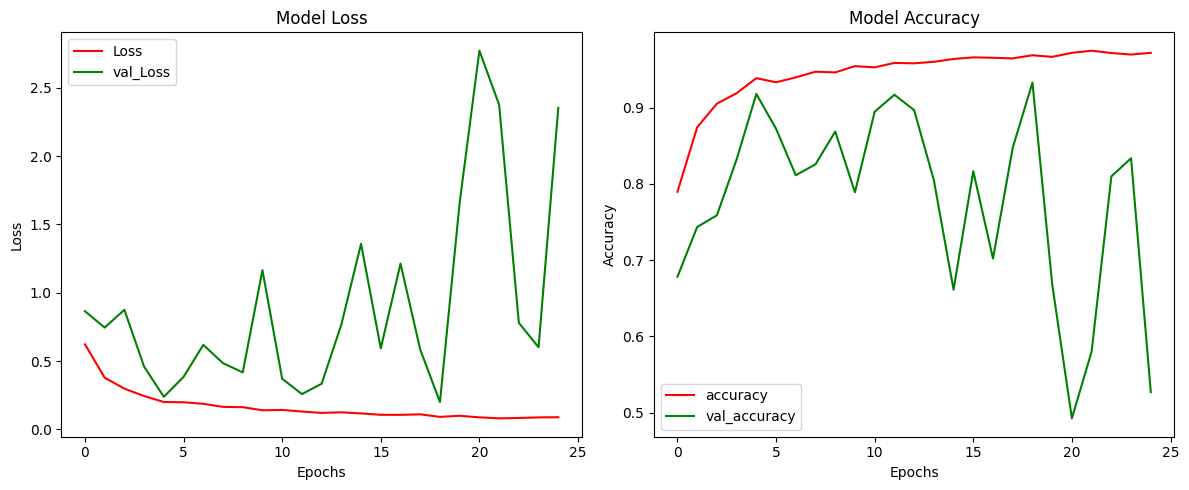

In [49]:
from matplotlib import pyplot as plt

# Creating a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Plotting Loss in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.plot(history.history['val_loss'], color='g', label='val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting Accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.plot(history.history['val_accuracy'], color='g', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()

# Conversion From RGB to HSV


In [23]:
import cv2
import os

# Directory containing subfolders with images
base_directory = '/content/kaggle/raw/color'

# Output directory to save the HSV images
output_directory = '/content/kaggle/raw/hsv'

# Loop through all subfolders
for folder_name in os.listdir(base_directory):
    subfolder = os.path.join(base_directory, folder_name)

    # Ensure it's a directory
    if os.path.isdir(subfolder):
        # Loop through all files in the subfolder
        for filename in os.listdir(subfolder):
            # Check if the file is an image (you can add more image extensions if needed)
            # if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
                # Load the color image
                color_image = cv2.imread(os.path.join(subfolder, filename))

                # Convert the color image to HSV
                hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.join(output_directory, folder_name), exist_ok=True)

                # Save the HSV image in the corresponding subfolder of the output directory
                output_filename = os.path.join(output_directory, folder_name, filename)
                cv2.imwrite(output_filename, hsv_image)



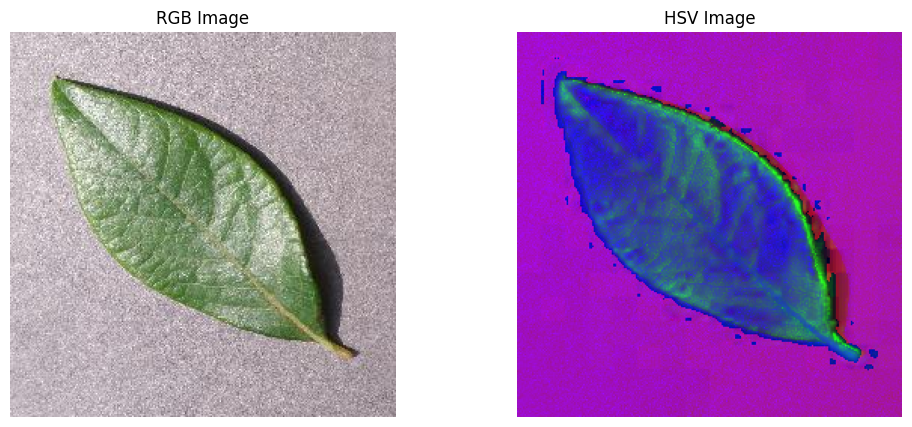

In [24]:
import cv2
import matplotlib.pyplot as plt

# Load your color image in RGB color space
color_image = cv2.imread('/content/kaggle/raw/color/Blueberry___healthy/00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert to RGB color space
    color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

    # Convert the same image to HSV color space
    hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

    # Display the images side by side
    plt.figure(figsize=(12, 5))

    # Display the RGB image
    plt.subplot(1, 2, 1)
    plt.imshow(color_image_rgb)
    plt.title('RGB Image')
    plt.axis('off')

    # Display the HSV image
    plt.subplot(1, 2, 2)
    plt.imshow(hsv_image, cmap='hsv')
    plt.title('HSV Image')
    plt.axis('off')

    plt.show()



In [25]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/kaggle/raw/hsv',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

Found 9446 images belonging to 10 classes.


In [26]:
model1 = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    # Residual Block 1
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),

    # Average-Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),

    layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),

    # Flatten before fully connected layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use validation_split to split your data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/hsv',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training data
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/hsv',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation data
)

# Now, you can use train_generator and validation_generator for training and validation.


Found 7560 images belonging to 10 classes.
Found 1886 images belonging to 10 classes.


In [28]:
from traitlets.traitlets import validate
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
237/237 [==============================] - 22s 91ms/step - loss: 0.6165 - accuracy: 0.8169 - val_loss: 0.3277 - val_accuracy: 0.8982
Epoch 2/25
237/237 [==============================] - 18s 77ms/step - loss: 0.3132 - accuracy: 0.8991 - val_loss: 0.3876 - val_accuracy: 0.8680
Epoch 3/25
237/237 [==============================] - 19s 81ms/step - loss: 0.2623 - accuracy: 0.9119 - val_loss: 0.6348 - val_accuracy: 0.8256
Epoch 4/25
237/237 [==============================] - 18s 78ms/step - loss: 0.2139 - accuracy: 0.9287 - val_loss: 0.1784 - val_accuracy: 0.9433
Epoch 5/25
237/237 [==============================] - 21s 88ms/step - loss: 0.1954 - accuracy: 0.9372 - val_loss: 0.2707 - val_accuracy: 0.9067
Epoch 6/25
237/237 [==============================] - 18s 77ms/step - loss: 0.1654 - accuracy: 0.9450 - val_loss: 0.1941 - val_accuracy: 0.9364
Epoch 7/25
237/237 [==============================] - 18s 75ms/step - loss: 0.1669 - accuracy: 0.9463 - val_loss: 0.4506 - val_accuracy:

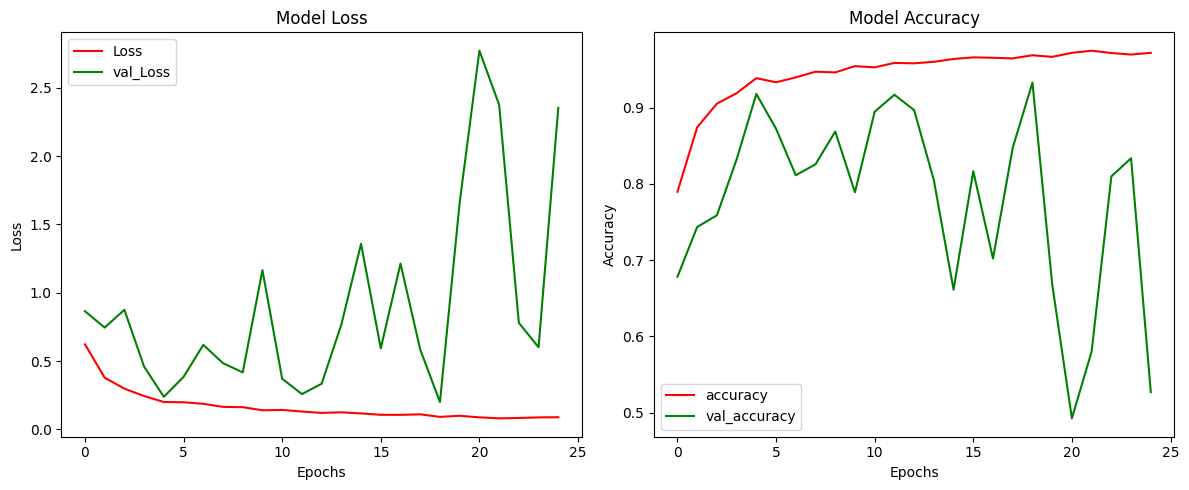

In [47]:
from matplotlib import pyplot as plt

# Creating a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Plotting Loss in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.plot(history.history['val_loss'], color='g', label='val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting Accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.plot(history.history['val_accuracy'], color='g', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()

#Conversion From RGB to Lab

In [32]:
import cv2
import os

# Directory containing subfolders with images
base_directory = '/content/kaggle/raw/color'

# Output directory to save the Lab images
output_directory = '/content/kaggle/raw/lab'

# Loop through all subfolders
for folder_name in os.listdir(base_directory):
    subfolder = os.path.join(base_directory, folder_name)

    # Ensure it's a directory
    if os.path.isdir(subfolder):
        # Loop through all files in the subfolder
        for filename in os.listdir(subfolder):
            # Check if the file is an image (you can add more image extensions if needed)
            # if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
                # Load the color image
                color_image = cv2.imread(os.path.join(subfolder, filename))

                # Convert the color image to Lab color space
                lab_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Lab)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.join(output_directory, folder_name), exist_ok=True)

                # Save the Lab image in the corresponding subfolder of the output directory
                output_filename = os.path.join(output_directory, folder_name, filename)
                cv2.imwrite(output_filename, lab_image)


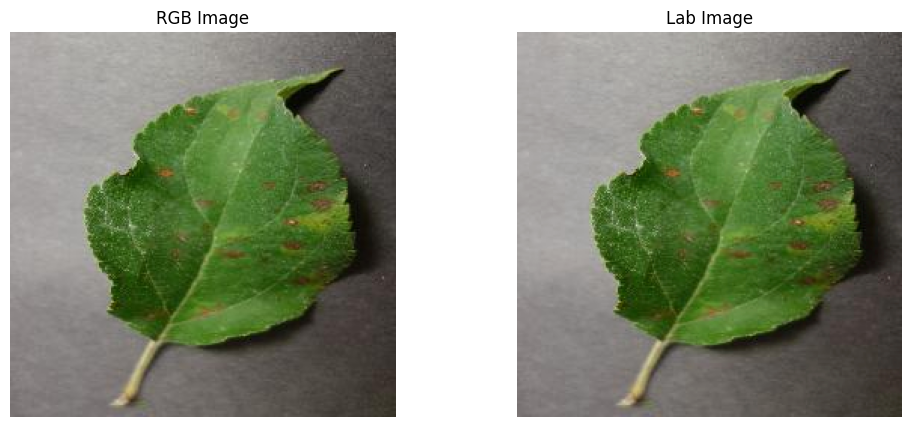

In [33]:
import cv2
import matplotlib.pyplot as plt

# Load your RGB color image
color_image = cv2.imread('/content/kaggle/raw/color/Apple___Cedar_apple_rust/0321e067-d13b-47d0-b3a6-76ba6f357d02___FREC_C.Rust 3667.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert the color image to Lab color space
    lab_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Lab)

    # Display the images side by side
    plt.figure(figsize=(12, 5))

    # Display the RGB image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('RGB Image')
    plt.axis('off')

    # Display the Lab image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(lab_image, cv2.COLOR_Lab2RGB))
    plt.title('Lab Image')
    plt.axis('off')

    plt.show()


In [34]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(
        '/content/kaggle/raw/lab',
        target_size=(32, 32),
        batch_size=32,
        class_mode='categorical')

Found 9446 images belonging to 10 classes.


In [35]:
model2 = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    # Residual Block 1
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),

    # Average-Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),

    layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),

    # Flatten before fully connected layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [36]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use validation_split to split your data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/lab',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training data
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/lab',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation data
)

# Now, you can use train_generator and validation_generator for training and validation.


Found 7560 images belonging to 10 classes.
Found 1886 images belonging to 10 classes.


In [38]:
from traitlets.traitlets import validate
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
237/237 [==============================] - 16s 69ms/step - loss: 0.6227 - accuracy: 0.7896 - val_loss: 0.8654 - val_accuracy: 0.6782
Epoch 2/25
237/237 [==============================] - 18s 77ms/step - loss: 0.3790 - accuracy: 0.8741 - val_loss: 0.7451 - val_accuracy: 0.7434
Epoch 3/25
237/237 [==============================] - 17s 70ms/step - loss: 0.2984 - accuracy: 0.9050 - val_loss: 0.8753 - val_accuracy: 0.7587
Epoch 4/25
237/237 [==============================] - 19s 80ms/step - loss: 0.2442 - accuracy: 0.9188 - val_loss: 0.4593 - val_accuracy: 0.8319
Epoch 5/25
237/237 [==============================] - 18s 76ms/step - loss: 0.2006 - accuracy: 0.9385 - val_loss: 0.2386 - val_accuracy: 0.9178
Epoch 6/25
237/237 [==============================] - 16s 69ms/step - loss: 0.1986 - accuracy: 0.9331 - val_loss: 0.3844 - val_accuracy: 0.8722
Epoch 7/25
237/237 [==============================] - 17s 70ms/step - loss: 0.1874 - accuracy: 0.9396 - val_loss: 0.6187 - val_accuracy:

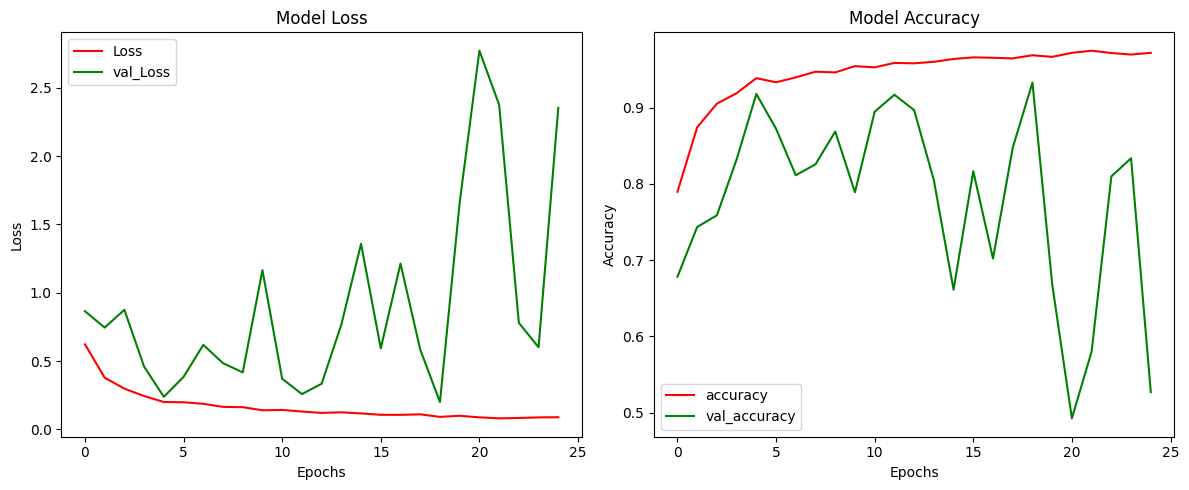

In [46]:
from matplotlib import pyplot as plt

# Creating a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Plotting Loss in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.plot(history.history['val_loss'], color='g', label='val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting Accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.plot(history.history['val_accuracy'], color='g', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()


# Conversion from RGB to YCrCb

In [50]:
import cv2
import os

# Directory containing subfolders with images
base_directory = '/content/kaggle/raw/color'

# Output directory to save the YCrCb images
output_directory = '/content/kaggle/raw/ycrcb'

# Loop through all subfolders
for folder_name in os.listdir(base_directory):
    subfolder = os.path.join(base_directory, folder_name)

    # Ensure it's a directory
    if os.path.isdir(subfolder):
        # Loop through all files in the subfolder
        for filename in os.listdir(subfolder):
            # Check if the file is an image (you can add more image extensions if needed)
            # if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
                # Load the color image
                color_image = cv2.imread(os.path.join(subfolder, filename))

                # Convert the color image to YCrCb color space
                ycrcb_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YCrCb)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.join(output_directory, folder_name), exist_ok=True)

                # Save the YCrCb image in the corresponding subfolder of the output directory
                output_filename = os.path.join(output_directory, folder_name, filename)
                cv2.imwrite(output_filename, ycrcb_image)


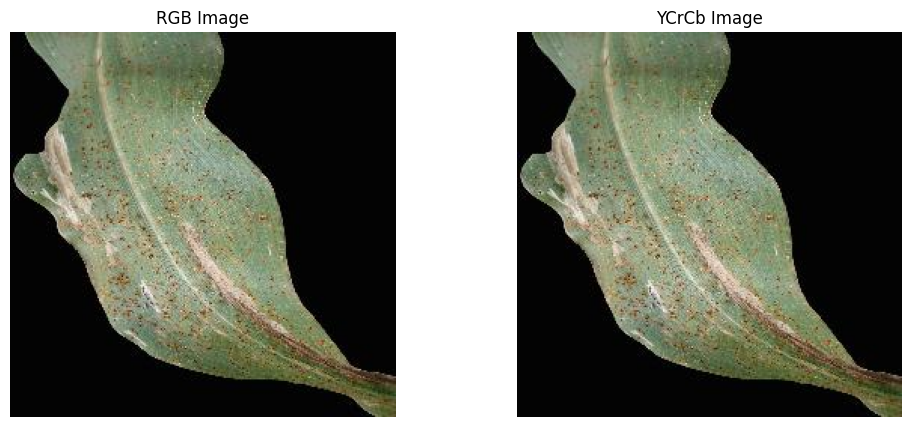

In [51]:
import cv2
import matplotlib.pyplot as plt

# Load your RGB color image
color_image = cv2.imread('/content/kaggle/raw/color/Corn_(maize)___Common_rust_/RS_Rust 1564.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert the color image to YCrCb color space
    ycrcb_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YCrCb)

    # Display the images side by side
    plt.figure(figsize=(12, 5))

    # Display the RGB image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('RGB Image')
    plt.axis('off')

    # Display the YCrCb image
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB))
    plt.title('YCrCb Image')
    plt.axis('off')

    plt.show()


In [52]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use validation_split to split your data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/ycrcb',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training data
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/ycrcb',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation data
)

# Now, you can use train_generator and validation_generator for training and validation.


Found 7560 images belonging to 10 classes.
Found 1886 images belonging to 10 classes.


In [53]:
model3 = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    # Residual Block 1
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),

    # Average-Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),

    layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),

    # Flatten before fully connected layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [56]:
from traitlets.traitlets import validate
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
237/237 [==============================] - 17s 74ms/step - loss: 0.2316 - accuracy: 0.9262 - val_loss: 0.2180 - val_accuracy: 0.9295
Epoch 2/25
237/237 [==============================] - 17s 73ms/step - loss: 0.1368 - accuracy: 0.9581 - val_loss: 0.1605 - val_accuracy: 0.9539
Epoch 3/25
237/237 [==============================] - 19s 82ms/step - loss: 0.1088 - accuracy: 0.9655 - val_loss: 0.3574 - val_accuracy: 0.8934
Epoch 4/25
237/237 [==============================] - 18s 74ms/step - loss: 0.1105 - accuracy: 0.9639 - val_loss: 0.2420 - val_accuracy: 0.9168
Epoch 5/25
237/237 [==============================] - 17s 73ms/step - loss: 0.0918 - accuracy: 0.9696 - val_loss: 0.1686 - val_accuracy: 0.9464
Epoch 6/25
237/237 [==============================] - 17s 72ms/step - loss: 0.0986 - accuracy: 0.9696 - val_loss: 2.4455 - val_accuracy: 0.6469
Epoch 7/25
237/237 [==============================] - 17s 73ms/step - loss: 0.0874 - accuracy: 0.9716 - val_loss: 0.1935 - val_accuracy:

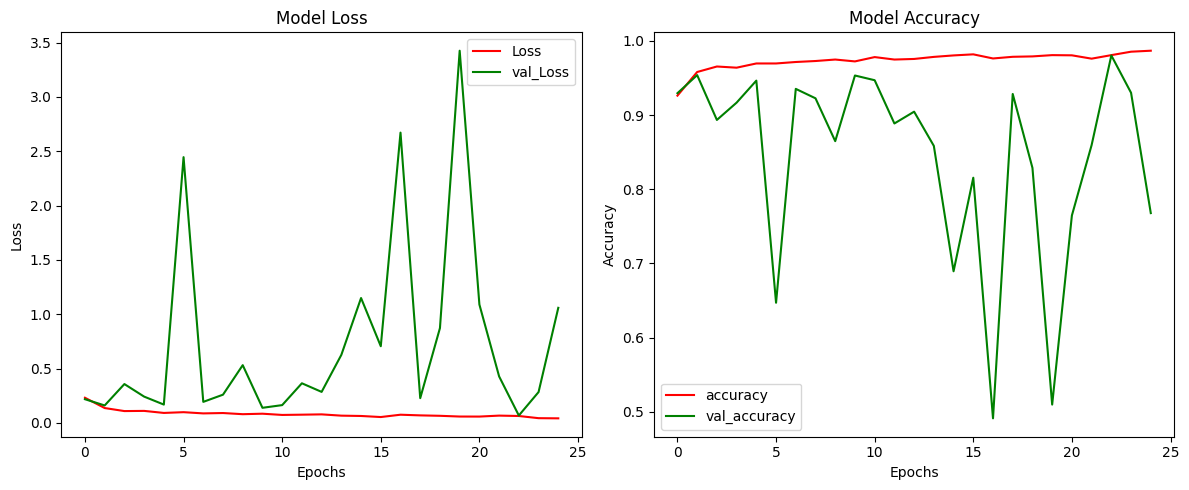

In [57]:
from matplotlib import pyplot as plt

# Creating a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Plotting Loss in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.plot(history.history['val_loss'], color='g', label='val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting Accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.plot(history.history['val_accuracy'], color='g', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()


# Conversion From RGb to XYZ

In [58]:
import cv2
import os

# Directory containing subfolders with images
base_directory = '/content/kaggle/raw/color'

# Output directory to save the XYZ images
output_directory = '/content/kaggle/raw/xyz'

# Loop through all subfolders
for folder_name in os.listdir(base_directory):
    subfolder = os.path.join(base_directory, folder_name)

    # Ensure it's a directory
    if os.path.isdir(subfolder):
        # Loop through all files in the subfolder
        for filename in os.listdir(subfolder):
            # Check if the file is an image (you can add more image extensions if needed)
            # if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
                # Load the color image
                color_image = cv2.imread(os.path.join(subfolder, filename))

                # Convert the color image to XYZ color space
                xyz_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2XYZ)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.join(output_directory, folder_name), exist_ok=True)

                # Save the XYZ image in the corresponding subfolder of the output directory
                output_filename = os.path.join(output_directory, folder_name, filename)
                cv2.imwrite(output_filename, xyz_image)


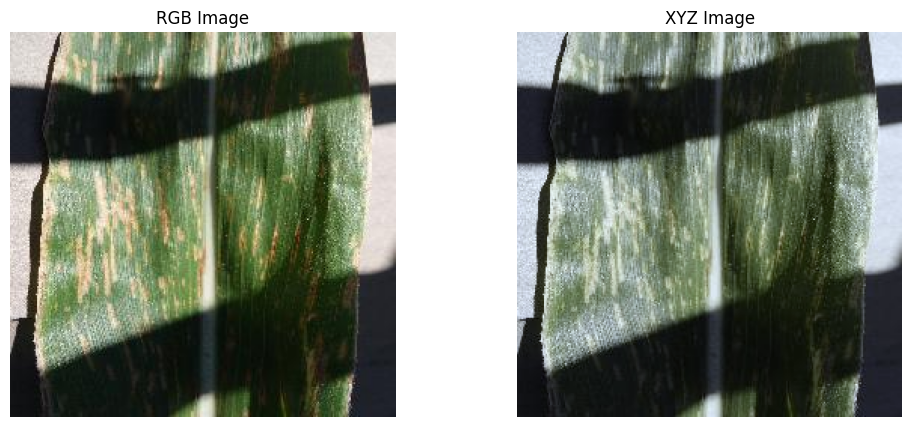

In [59]:
import cv2
import matplotlib.pyplot as plt

# Load your RGB color image
color_image = cv2.imread('/content/kaggle/raw/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/01a02916-5d4c-4256-936b-6b1a9ee65b11___RS_GLSp 9276.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert the color image to XYZ color space
    xyz_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2XYZ)

    # Display the images side by side
    plt.figure(figsize=(12, 5))

    # Display the RGB image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('RGB Image')
    plt.axis('off')

    # Display the XYZ image
    plt.subplot(1, 2, 2)
    plt.imshow(xyz_image)
    plt.title('XYZ Image')
    plt.axis('off')

    plt.show()


In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use validation_split to split your data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/xyz',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training data
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/xyz',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation data
)

# Now, you can use train_generator and validation_generator for training and validation.


Found 7560 images belonging to 10 classes.
Found 1886 images belonging to 10 classes.


In [61]:
model4 = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    # Residual Block 1
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),

    # Average-Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),

    layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),

    # Flatten before fully connected layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [62]:
from traitlets.traitlets import validate
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
237/237 [==============================] - 18s 77ms/step - loss: 0.6076 - accuracy: 0.8127 - val_loss: 0.5663 - val_accuracy: 0.8218
Epoch 2/25
237/237 [==============================] - 19s 79ms/step - loss: 0.3439 - accuracy: 0.8868 - val_loss: 0.3718 - val_accuracy: 0.8823
Epoch 3/25
237/237 [==============================] - 19s 81ms/step - loss: 0.3259 - accuracy: 0.8934 - val_loss: 0.3304 - val_accuracy: 0.8940
Epoch 4/25
237/237 [==============================] - 21s 88ms/step - loss: 0.2714 - accuracy: 0.9112 - val_loss: 0.4776 - val_accuracy: 0.8324
Epoch 5/25
237/237 [==============================] - 18s 76ms/step - loss: 0.2425 - accuracy: 0.9197 - val_loss: 0.3882 - val_accuracy: 0.8743
Epoch 6/25
237/237 [==============================] - 19s 81ms/step - loss: 0.2205 - accuracy: 0.9250 - val_loss: 0.3720 - val_accuracy: 0.8770
Epoch 7/25
237/237 [==============================] - 18s 76ms/step - loss: 0.2271 - accuracy: 0.9228 - val_loss: 0.5538 - val_accuracy:

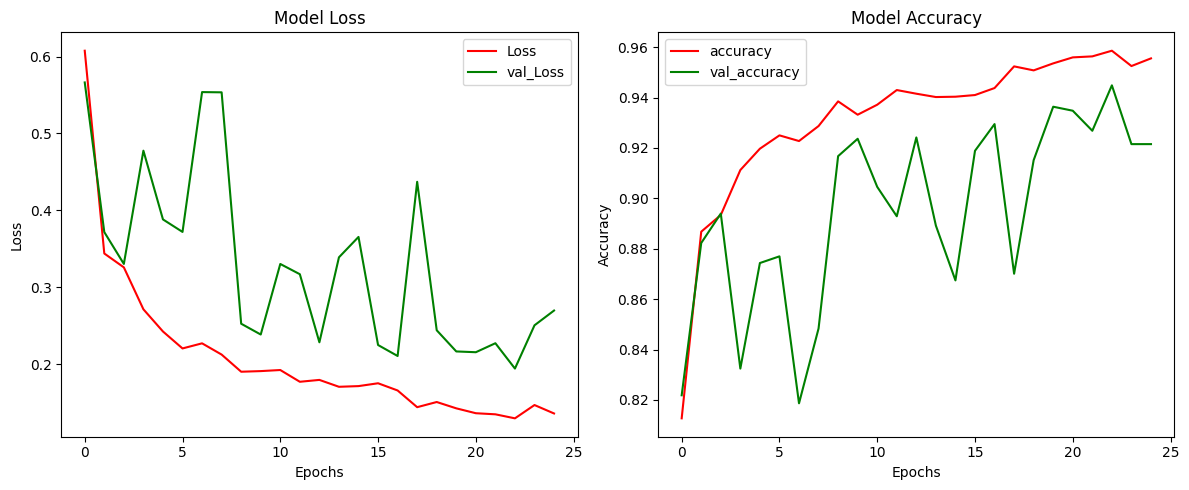

In [63]:
from matplotlib import pyplot as plt

# Creating a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Plotting Loss in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.plot(history.history['val_loss'], color='g', label='val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting Accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.plot(history.history['val_accuracy'], color='g', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()


# Conversion From RGB to HLS

In [64]:
import cv2
import os

# Directory containing subfolders with images
base_directory = '/content/kaggle/raw/color'

# Output directory to save the HLS images
output_directory = '/content/kaggle/raw/hls'

# Loop through all subfolders
for folder_name in os.listdir(base_directory):
    subfolder = os.path.join(base_directory, folder_name)

    # Ensure it's a directory
    if os.path.isdir(subfolder):
        # Loop through all files in the subfolder
        for filename in os.listdir(subfolder):
            # Check if the file is an image (you can add more image extensions if needed)
            # if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
                # Load the color image
                color_image = cv2.imread(os.path.join(subfolder, filename))

                # Convert the color image to HLS color space
                hls_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HLS)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.join(output_directory, folder_name), exist_ok=True)

                # Save the HLS image in the corresponding subfolder of the output directory
                output_filename = os.path.join(output_directory, folder_name, filename)
                cv2.imwrite(output_filename, hls_image)


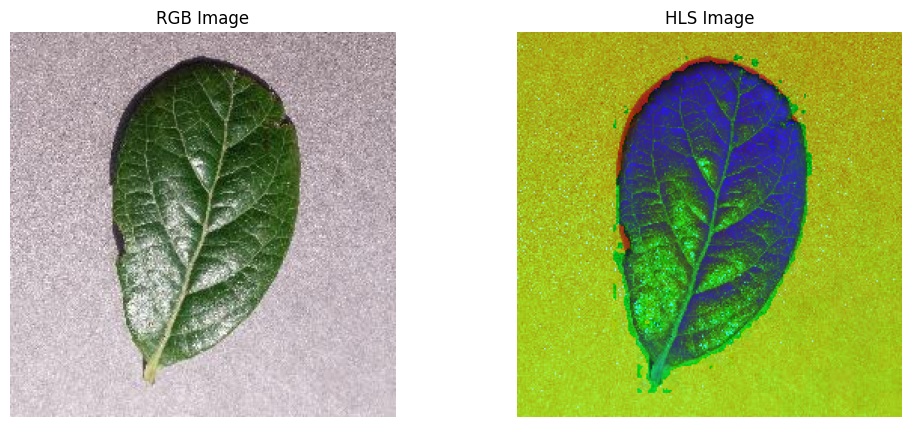

In [65]:
import cv2
import matplotlib.pyplot as plt

# Load your RGB color image
color_image = cv2.imread('/content/kaggle/raw/color/Blueberry___healthy/02159532-6430-4006-a245-421593949304___RS_HL 2686.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert the color image to HLS color space
    hls_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HLS)

    # Display the images side by side
    plt.figure(figsize=(12, 5))

    # Display the RGB image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('RGB Image')
    plt.axis('off')

    # Display the HLS image
    plt.subplot(1, 2, 2)
    plt.imshow(hls_image)
    plt.title('HLS Image')
    plt.axis('off')

    plt.show()


In [69]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use validation_split to split your data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/hls',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training data
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/hls',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation data
)

# Now, you can use train_generator and validation_generator for training and validation.


Found 7560 images belonging to 10 classes.
Found 1886 images belonging to 10 classes.


In [71]:
model5 = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    # Residual Block 1
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),

    # Average-Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),

    layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),

    # Flatten before fully connected layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [73]:
from traitlets.traitlets import validate
model5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
237/237 [==============================] - 18s 76ms/step - loss: 0.3270 - accuracy: 0.8878 - val_loss: 2.8084 - val_accuracy: 0.5085
Epoch 2/25
237/237 [==============================] - 18s 77ms/step - loss: 0.2398 - accuracy: 0.9192 - val_loss: 2.7703 - val_accuracy: 0.4692
Epoch 3/25
237/237 [==============================] - 20s 82ms/step - loss: 0.1956 - accuracy: 0.9366 - val_loss: 2.1028 - val_accuracy: 0.5716
Epoch 4/25
237/237 [==============================] - 18s 78ms/step - loss: 0.1882 - accuracy: 0.9381 - val_loss: 3.0213 - val_accuracy: 0.5164
Epoch 5/25
237/237 [==============================] - 18s 77ms/step - loss: 0.1675 - accuracy: 0.9474 - val_loss: 1.6816 - val_accuracy: 0.5509
Epoch 6/25
237/237 [==============================] - 20s 83ms/step - loss: 0.1459 - accuracy: 0.9519 - val_loss: 2.8910 - val_accuracy: 0.5048
Epoch 7/25
237/237 [==============================] - 19s 78ms/step - loss: 0.1324 - accuracy: 0.9578 - val_loss: 3.7514 - val_accuracy:

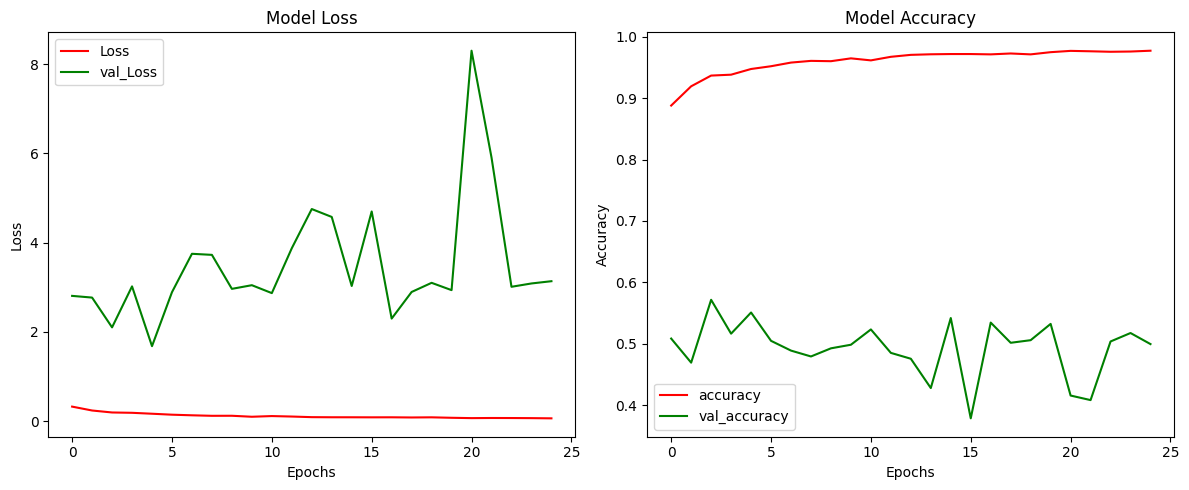

In [74]:
from matplotlib import pyplot as plt

# Creating a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Plotting Loss in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.plot(history.history['val_loss'], color='g', label='val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting Accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.plot(history.history['val_accuracy'], color='g', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()


#Conversion from RGB to Luv

In [75]:
import cv2
import os

# Directory containing subfolders with images
base_directory = '/content/kaggle/raw/color'

# Output directory to save the Luv images
output_directory = '/content/kaggle/raw/luv'

# Loop through all subfolders
for folder_name in os.listdir(base_directory):
    subfolder = os.path.join(base_directory, folder_name)

    # Ensure it's a directory
    if os.path.isdir(subfolder):
        # Loop through all files in the subfolder
        for filename in os.listdir(subfolder):
            # Check if the file is an image (you can add more image extensions if needed)
            # if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
                # Load the color image
                color_image = cv2.imread(os.path.join(subfolder, filename))

                # Convert the color image to Luv color space
                luv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Luv)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.join(output_directory, folder_name), exist_ok=True)

                # Save the Luv image in the corresponding subfolder of the output directory
                output_filename = os.path.join(output_directory, folder_name, filename)
                cv2.imwrite(output_filename, luv_image)


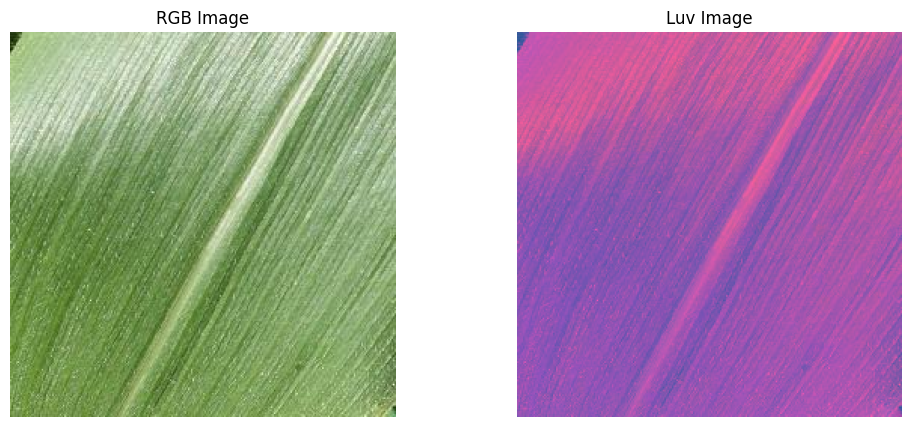

In [76]:
import cv2
import matplotlib.pyplot as plt

# Load your RGB color image
color_image = cv2.imread('/content/kaggle/raw/color/Corn_(maize)___healthy/028ed539-32f5-4540-a6af-466179837de9___R.S_HL 8212 copy.jpg')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert the color image to Luv color space
    luv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Luv)

    # Display the images side by side
    plt.figure(figsize=(12, 5))

    # Display the RGB image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('RGB Image')
    plt.axis('off')

    # Display the Luv image
    plt.subplot(1, 2, 2)
    plt.imshow(luv_image)
    plt.title('Luv Image')
    plt.axis('off')

    plt.show()


In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use validation_split to split your data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/luv',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training data
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/luv',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation data
)

# Now, you can use train_generator and validation_generator for training and validation.


Found 7560 images belonging to 10 classes.
Found 1886 images belonging to 10 classes.


In [79]:
model6 = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    # Residual Block 1
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),

    # Average-Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),

    layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),

    # Flatten before fully connected layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [80]:
from traitlets.traitlets import validate
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
237/237 [==============================] - 18s 75ms/step - loss: 0.3935 - accuracy: 0.8803 - val_loss: 0.8571 - val_accuracy: 0.7566
Epoch 2/25
237/237 [==============================] - 17s 71ms/step - loss: 0.1401 - accuracy: 0.9548 - val_loss: 0.3475 - val_accuracy: 0.8818
Epoch 3/25
237/237 [==============================] - 17s 71ms/step - loss: 0.1152 - accuracy: 0.9635 - val_loss: 0.3096 - val_accuracy: 0.9019
Epoch 4/25
237/237 [==============================] - 18s 74ms/step - loss: 0.0916 - accuracy: 0.9697 - val_loss: 0.5536 - val_accuracy: 0.8160
Epoch 5/25
237/237 [==============================] - 17s 72ms/step - loss: 0.0854 - accuracy: 0.9728 - val_loss: 0.2354 - val_accuracy: 0.9305
Epoch 6/25
237/237 [==============================] - 17s 74ms/step - loss: 0.0661 - accuracy: 0.9792 - val_loss: 0.1365 - val_accuracy: 0.9549
Epoch 7/25
237/237 [==============================] - 17s 72ms/step - loss: 0.0740 - accuracy: 0.9772 - val_loss: 0.2563 - val_accuracy:

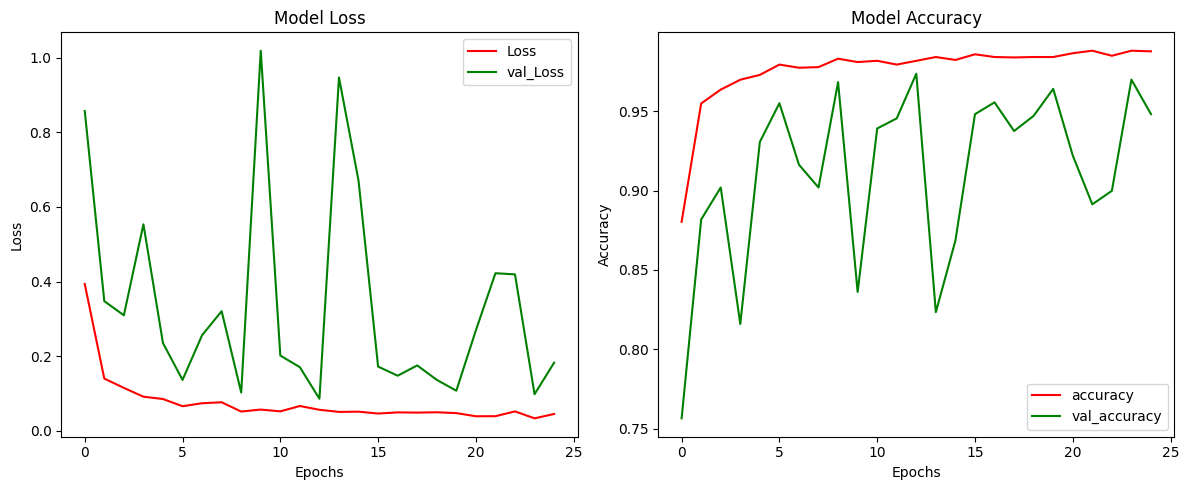

In [81]:
from matplotlib import pyplot as plt

# Creating a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Plotting Loss in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.plot(history.history['val_loss'], color='g', label='val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting Accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.plot(history.history['val_accuracy'], color='g', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()


#Conversio From RGB to YUV

In [82]:
import cv2
import os

# Directory containing subfolders with images
base_directory = '/content/kaggle/raw/color'

# Output directory to save the YUV images
output_directory = '/content/kaggle/raw/yuv'

# Loop through all subfolders
for folder_name in os.listdir(base_directory):
    subfolder = os.path.join(base_directory, folder_name)

    # Ensure it's a directory
    if os.path.isdir(subfolder):
        # Loop through all files in the subfolder
        for filename in os.listdir(subfolder):
            # Check if the file is an image (you can add more image extensions if needed)
            # if filename.endswith(('.jpg', '.png', '.jpeg', '.bmp')):
                # Load the color image
                color_image = cv2.imread(os.path.join(subfolder, filename))

                # Convert the color image to YUV color space
                yuv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)

                # Create the output directory if it doesn't exist
                os.makedirs(os.path.join(output_directory, folder_name), exist_ok=True)

                # Save the YUV image in the corresponding subfolder of the output directory
                output_filename = os.path.join(output_directory, folder_name, filename)
                cv2.imwrite(output_filename, yuv_image)


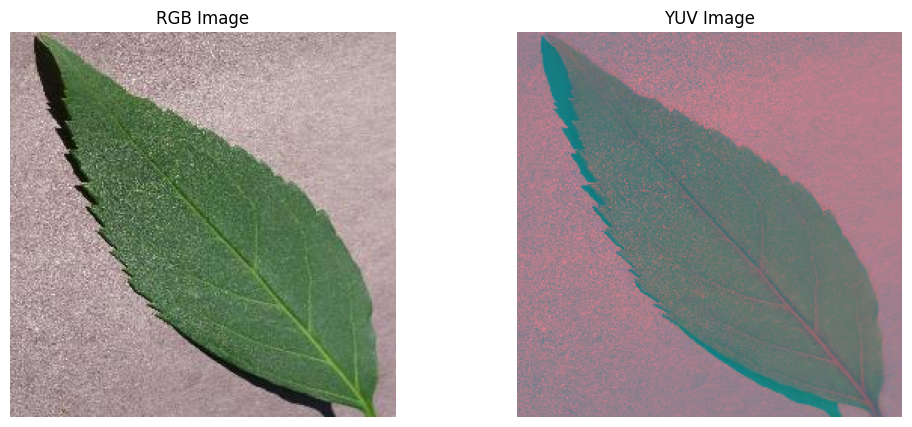

In [83]:
import cv2
import matplotlib.pyplot as plt

# Load your RGB color image
color_image = cv2.imread('/content/kaggle/raw/color/Cherry_(including_sour)___healthy/00a8e886-d172-4261-85e2-780b3c50ad4d___JR_HL 4156.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert the color image to YUV color space
    yuv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)

    # Display the images side by side
    plt.figure(figsize=(12, 5))

    # Display the RGB image
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
    plt.title('RGB Image')
    plt.axis('off')

    # Display the YUV image
    plt.subplot(1, 2, 2)
    plt.imshow(yuv_image)
    plt.title('YUV Image')
    plt.axis('off')

    plt.show()


In [85]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data generators for training and validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Use validation_split to split your data
)

# Training generator
train_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/yuv',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Specify the subset as 'training' for the training data
)

# Validation generator
validation_generator = train_datagen.flow_from_directory(
    '/content/kaggle/raw/yuv',
    target_size=(32, 32),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Specify the subset as 'validation' for the validation data
)

# Now, you can use train_generator and validation_generator for training and validation.



Found 7560 images belonging to 10 classes.
Found 1886 images belonging to 10 classes.


In [86]:
model7 = models.Sequential([
    layers.Conv2D(54, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.MaxPooling2D((2, 2)),

    # Residual Block 1
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),
    layers.Conv2D(108, kernel_size=(3,3),groups=3,input_shape=(32,32,3),padding='same',activation ='relu'),
    layers.BatchNormalization(),
    tf.keras.layers.PReLU(alpha_initializer='zeros',alpha_regularizer=None,alpha_constraint=None,shared_axes=None),

    # Average-Pooling
    tf.keras.layers.AveragePooling2D(pool_size=(2, 2),strides=None,padding='valid',data_format=None),

    layers.Conv2D(108, kernel_size=(1,1),groups=3,input_shape=(32,32,3),padding='same',activation='relu'),

    # Flatten before fully connected layers
    layers.Flatten(),

    # Fully Connected Layers
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Add dropout for regularization
    layers.Dense(64, activation='relu'),

    # Output Layer
    layers.Dense(10, activation='softmax')
])

In [87]:
from traitlets.traitlets import validate
model6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history=model.fit(train_generator,validation_data=validation_generator,epochs=25)

Epoch 1/25
237/237 [==============================] - 20s 82ms/step - loss: 0.2775 - accuracy: 0.9193 - val_loss: 0.4306 - val_accuracy: 0.8632
Epoch 2/25
237/237 [==============================] - 17s 74ms/step - loss: 0.1243 - accuracy: 0.9599 - val_loss: 0.1960 - val_accuracy: 0.9411
Epoch 3/25
237/237 [==============================] - 19s 80ms/step - loss: 0.0953 - accuracy: 0.9709 - val_loss: 0.2264 - val_accuracy: 0.9252
Epoch 4/25
237/237 [==============================] - 17s 70ms/step - loss: 0.0881 - accuracy: 0.9730 - val_loss: 0.1587 - val_accuracy: 0.9443
Epoch 5/25
237/237 [==============================] - 17s 73ms/step - loss: 0.0819 - accuracy: 0.9747 - val_loss: 0.1256 - val_accuracy: 0.9560
Epoch 6/25
237/237 [==============================] - 17s 71ms/step - loss: 0.0649 - accuracy: 0.9783 - val_loss: 0.1327 - val_accuracy: 0.9523
Epoch 7/25
237/237 [==============================] - 16s 69ms/step - loss: 0.0693 - accuracy: 0.9774 - val_loss: 0.3731 - val_accuracy:

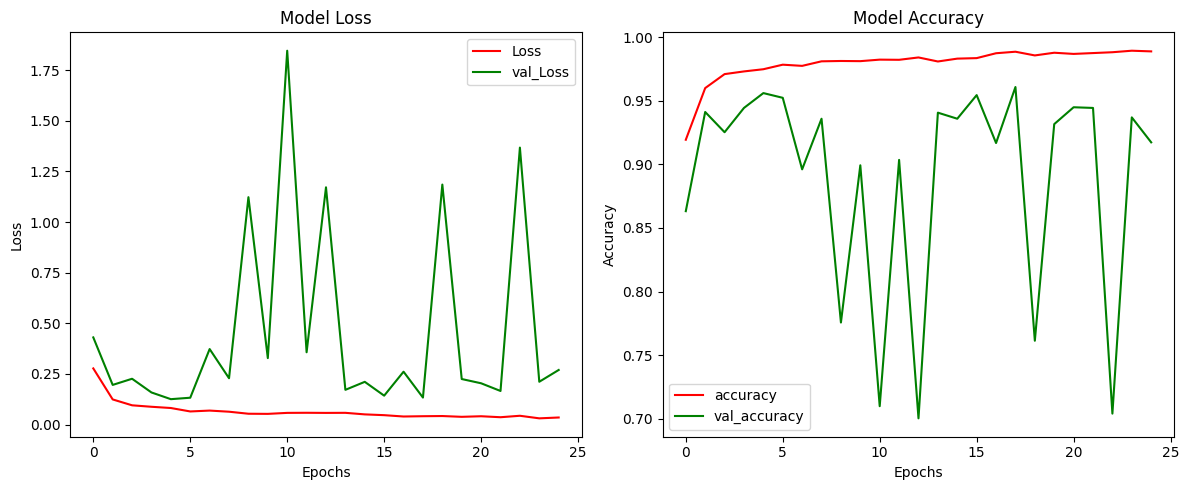

In [88]:
from matplotlib import pyplot as plt

# Creating a 1x2 subplot grid
plt.figure(figsize=(12, 5))

# Plotting Loss in the first subplot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='r', label='Loss')
plt.plot(history.history['val_loss'], color='g', label='val_Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

# Plotting Accuracy in the second subplot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], color='r', label='accuracy')
plt.plot(history.history['val_accuracy'], color='g', label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend()

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plots
plt.show()


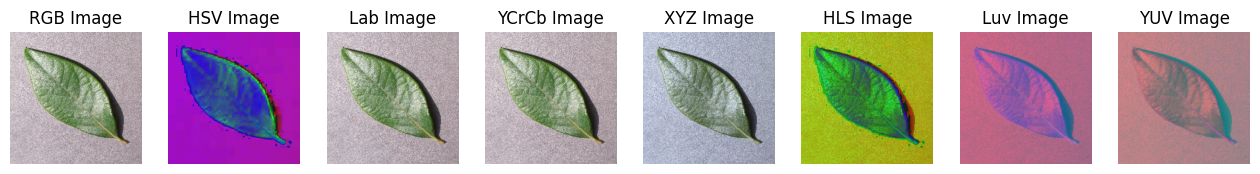

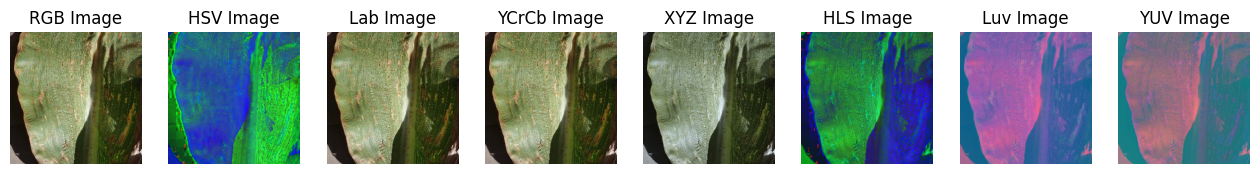

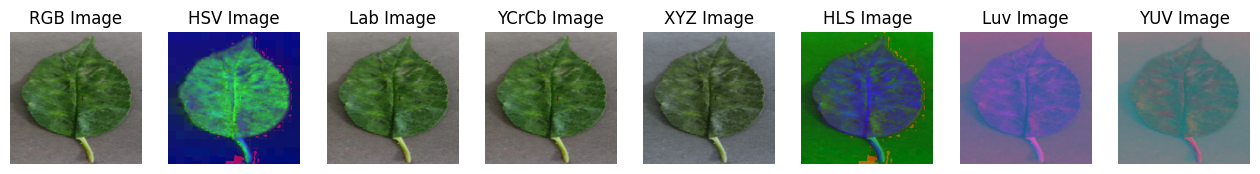

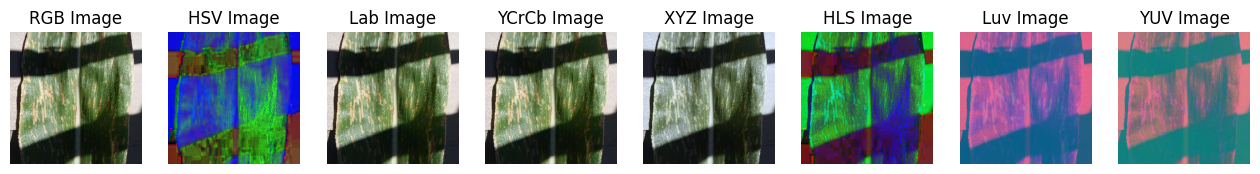

In [103]:
import cv2
import matplotlib.pyplot as plt

# Load your color image in RGB color space
color_image = cv2.imread('/content/kaggle/raw/color/Blueberry___healthy/00fee259-67b7-4dd7-8b36-12503bbdba14___RS_HL 2681.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert to RGB color space
    color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

    # Convert the same image to HSV color space
    hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

    # Convert the color image to Lab color space
    lab_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Lab)
    # Convert the color image to YCrCb color space
    ycrcb_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YCrCb)
    # Convert the color image to XYZ color space
    xyz_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2XYZ)
    # Convert the color image to HLS color space
    hls_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HLS)
    # Convert the color image to Luv color space
    luv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Luv)
    # Convert the color image to YUV color space
    yuv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)

    # List of images and their titles
    images = [
        (color_image_rgb, 'RGB Image'),
        (hsv_image, 'HSV Image'),
        (cv2.cvtColor(lab_image, cv2.COLOR_Lab2RGB), 'Lab Image'),
        (cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB), 'YCrCb Image'),
        (xyz_image, 'XYZ Image'),
        (hls_image, 'HLS Image'),
        (luv_image, 'Luv Image'),
        (yuv_image, 'YUV Image')
    ]

    # Display the images in subplots (horizontal layout)
    plt.figure(figsize=(16, 3))

    for i, (img, title) in enumerate(images, start=1):
        plt.subplot(1, len(images), i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')

    plt.show()




# Load your color image in RGB color space
color_image = cv2.imread('/content/kaggle/raw/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00120a18-ff90-46e4-92fb-2b7a10345bd3___RS_GLSp 9357.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert to RGB color space
    color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

    # Convert the same image to HSV color space
    hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

    # Convert the color image to Lab color space
    lab_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Lab)
    # Convert the color image to YCrCb color space
    ycrcb_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YCrCb)
    # Convert the color image to XYZ color space
    xyz_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2XYZ)
    # Convert the color image to HLS color space
    hls_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HLS)
    # Convert the color image to Luv color space
    luv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Luv)
    # Convert the color image to YUV color space
    yuv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)

    # # List of images and their titles
    images = [
        (color_image_rgb, 'RGB Image'),
        (hsv_image, 'HSV Image'),
        (cv2.cvtColor(lab_image, cv2.COLOR_Lab2RGB), 'Lab Image'),
        (cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB), 'YCrCb Image'),
        (xyz_image, 'XYZ Image'),
        (hls_image, 'HLS Image'),
        (luv_image, 'Luv Image'),
        (yuv_image, 'YUV Image')
    ]

    # Display the images in subplots (horizontal layout)
    plt.figure(figsize=(16, 3))

    for i, (img, title) in enumerate(images, start=1):
        plt.subplot(1, len(images), i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')

    plt.show()


# Load your color image in RGB color space
color_image = cv2.imread('/content/kaggle/raw/color/Cherry_(including_sour)___Powdery_mildew/00f8611c-0f2c-4f24-8241-d1748c8bb48f___FREC_Pwd.M 0479.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert to RGB color space
    color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

    # Convert the same image to HSV color space
    hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

    # Convert the color image to Lab color space
    lab_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Lab)
    # Convert the color image to YCrCb color space
    ycrcb_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YCrCb)
    # Convert the color image to XYZ color space
    xyz_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2XYZ)
    # Convert the color image to HLS color space
    hls_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HLS)
    # Convert the color image to Luv color space
    luv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Luv)
    # Convert the color image to YUV color space
    yuv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)

    # # List of images and their titles
    images = [
        (color_image_rgb, 'RGB Image'),
        (hsv_image, 'HSV Image'),
        (cv2.cvtColor(lab_image, cv2.COLOR_Lab2RGB), 'Lab Image'),
        (cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB), 'YCrCb Image'),
        (xyz_image, 'XYZ Image'),
        (hls_image, 'HLS Image'),
        (luv_image, 'Luv Image'),
        (yuv_image, 'YUV Image')
    ]

    # Display the images in subplots (horizontal layout)
    plt.figure(figsize=(16, 3))

    for i, (img, title) in enumerate(images, start=1):
        plt.subplot(1, len(images), i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')

    plt.show()



# Load your color image in RGB color space
color_image = cv2.imread('/content/kaggle/raw/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/01a02916-5d4c-4256-936b-6b1a9ee65b11___RS_GLSp 9276.JPG')

# Check if the image was loaded successfully
if color_image is None:
    print("Error: Could not load the image.")
else:
    # Convert to RGB color space
    color_image_rgb = cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB)

    # Convert the same image to HSV color space
    hsv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HSV)

    # Convert the color image to Lab color space
    lab_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Lab)
    # Convert the color image to YCrCb color space
    ycrcb_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YCrCb)
    # Convert the color image to XYZ color space
    xyz_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2XYZ)
    # Convert the color image to HLS color space
    hls_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2HLS)
    # Convert the color image to Luv color space
    luv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2Luv)
    # Convert the color image to YUV color space
    yuv_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2YUV)

    # List of images and their titles
    images = [
        (color_image_rgb, 'RGB Image'),
        (hsv_image, 'HSV Image'),
        (cv2.cvtColor(lab_image, cv2.COLOR_Lab2RGB), 'Lab Image'),
        (cv2.cvtColor(ycrcb_image, cv2.COLOR_YCrCb2RGB), 'YCrCb Image'),
        (xyz_image, 'XYZ Image'),
        (hls_image, 'HLS Image'),
        (luv_image, 'Luv Image'),
        (yuv_image, 'YUV Image')
    ]

    # Display the images in subplots (horizontal layout)
    plt.figure(figsize=(16, 3))

    for i, (img, title) in enumerate(images, start=1):
        plt.subplot(1, len(images), i)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')

    plt.show()




